In [2]:
import pandas as pd
students = pd.read_csv('StudentsPerformance.csv')
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


This is just a sample of what the dataset looks like.

In [114]:
gender_avg_scores = round(students.groupby("gender").agg({"math score": "mean", "reading score": "mean",
                                                    "writing score": "mean"}), 2)
gender_avg_scores["avg_score"] = round((gender_avg_scores.sum(axis=1)) / 3, 2)
gender_avg_scores

,math score,reading score,writing score,avg_score
gender,,,,
female,63.63,72.61,72.47,69.57
male,68.73,65.47,63.31,65.84


When I saw that the data had a column giving the gender of the student, I couldn't help but compare the
scores. So apparently, males are better at math than females. But females are better at reading and writing,
and they also have a better average score overall. :p

In [115]:
prep_scores = round(students.groupby("test preparation course").agg({"math score": "mean", "reading score": "mean",
                                                              "writing score": "mean"}), 2)
prep_scores["avg_score"] = round((prep_scores.sum(axis=1)) / 3, 2)
prep_scores

,math score,reading score,writing score,avg_score
test preparation course,,,,
completed,69.70,73.89,74.42,72.67
none,64.08,66.53,64.50,65.04


Proof that you should always study for tests.

In [176]:
tpc_goodScores = students.query("`test preparation course` == 'completed' and `math score` >= 90 and `reading score` >= 90 and `writing score` >= 90")
NOtpc_goodScores = students.query("`test preparation course` == 'none' and `math score` >= 90 and `reading score` >= 90 and `writing score` >= 90")
print("Number of students who took test preparation course and have scores over 90:\t\t", len(tpc_goodScores))
print("Number of students who did not take test preparation course and have scores over 90:\t", len(NOtpc_goodScores))

Number of students who took test preparation course and have scores over 90:		 17
Number of students who did not take test preparation course and have scores over 90:	 11


More proof that you should always study for tests.

In [112]:
par_lunch = students.groupby('parental level of education').agg({'lunch': 'sum'})
standard = par_lunch['lunch'].str.count('standard')
free_r = par_lunch['lunch'].str.count('free/reduced')
par_lunch['num_standard'] = standard
par_lunch['num_free/reduced'] = free_r
del par_lunch['lunch']
par_lunch

,num_standard,num_free/reduced
parental level of education,,
associate's degree,145,77
bachelor's degree,74,44
high school,126,70
master's degree,35,24
some college,147,79
some high school,118,61


I don't actually fully know what all of those degree levels mean, but from the little
I do know, I was expecting there to be less free/reduced lunches in the master's
degree category.

In [186]:
all_avg = round(students.groupby('race/ethnicity').agg({"math score": "mean", "reading score": "mean",
                                                  "writing score": "mean"}), 2)
all_avg

,math score,reading score,writing score
race/ethnicity,,,
group A,61.63,64.67,62.67
group B,63.45,67.35,65.60
group C,64.46,69.10,67.83
group D,67.36,70.03,70.15
group E,73.82,73.03,71.41


So... race affects your scores. I don't think that's a coincedence.

In [157]:
print("Highest math score:\t", students['math score'].max())
print("Highest reading score:\t", students['reading score'].max())
print("Highest writing score:\t", students['writing score'].max())
print("Lowest math score:\t", students['math score'].min())
print("Lowest reading score:\t", students['reading score'].min())
print("Lowest writing score:\t", students['writing score'].min())

Highest math score:	 100
Highest reading score:	 100
Highest writing score:	 100
Lowest math score:	 0
Lowest reading score:	 17
Lowest writing score:	 10


That's surprising. I expected all the lowest scores to be 0.

In [185]:
allFull = students.query("`math score` == 100 and `reading score` == 100 and `writing score` == 100")
print("Number of students with all 100s:\t", len(allFull))
print("Number of students total:\t\t", len(students))
print("Percent of students with all 100s:\t", len(allFull) / len(students))
allFull

Number of students with all 100s:	 3
Number of students total:		 1000
Percent of students with all 100s:	 0.003


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


Wow, that's SUPER impressive. And two of them didn't even complete a test preparation course!
But they're all in the same race/ethnicity group...

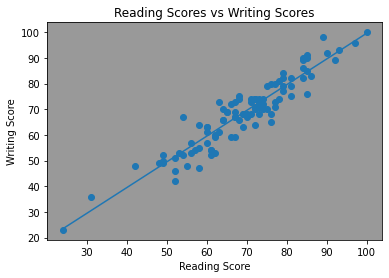

In [187]:
import matplotlib.pyplot as plt
import numpy as np

ws = []
rs = []

for i in range(len(students)):
    if i % 10 == 0:
        ws.append(students['writing score'][i])
        rs.append(students['reading score'][i])

scatter_wrs = plt.scatter(rs, ws)
plt.ylabel('Writing Score')
plt.xlabel('Reading Score')
plt.title('Reading Scores vs Writing Scores')
plt.plot(np.unique(rs), np.poly1d(np.polyfit(rs, ws, 1))(np.unique(rs)))
ax = plt.gca()
ax.set_facecolor('#999999')

To all you non-readers out there, it looks like you're going to flunk two tests
instead of one!

END OF PRESENTABLE STUFF

Below are failed attempts at graphs. I excluded them when I presented.

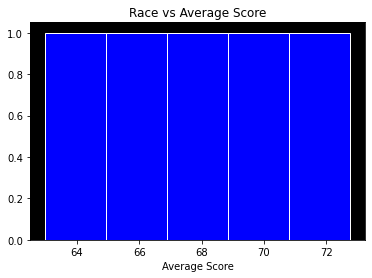

In [133]:
import matplotlib.pyplot as plt

all_avg = students.groupby('race/ethnicity').agg({"math score": "mean", "reading score": "mean",
                                                  "writing score": "mean"})
all_avg['avg'] = round((all_avg.sum(axis=1)) / 3, 3)
gA = all_avg.loc['group A', 'avg']
gB = all_avg.loc['group B', 'avg']
gC = all_avg.loc['group C', 'avg']
gD = all_avg.loc['group D', 'avg']
gE = all_avg.loc['group E', 'avg']
data = [gA, gB, gC, gD, gE]
#bins = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
#bins = [1, 2, 3, 4, 5]

plt.hist(data, bins=5, color='#0000ff', edgecolor='w')
#plt.ylabel('Race/Ethnicity Group')
plt.xlabel('Average Score')
plt.title('Race vs Average Score')
#plt.xlim(60, 80)

ax = plt.gca()
ax.set_facecolor('#000000')
plt.show()

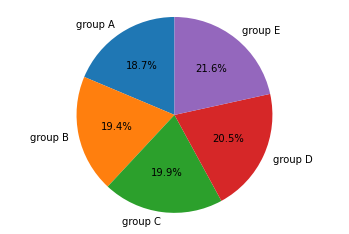

In [85]:
labels = 'group A', 'group B', 'group C', 'group D', 'group E'
gA = all_avg.loc['group A', 'avg']
gB = all_avg.loc['group B', 'avg']
gC = all_avg.loc['group C', 'avg']
gD = all_avg.loc['group D', 'avg']
gE = all_avg.loc['group E', 'avg']
data = [gA, gB, gC, gD, gE]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis ('equal')
plt.show()
#This one was a mistake, ignore it. It's not useful.